### 2. Numpy

In [1]:
import numpy as np

In [3]:
arr1 = np.arange(15).reshape(3,5)
print(arr1)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [5]:
python_array = [0,1,2,3,4,5,6]
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
np.array(python_array)

array([0, 1, 2, 3, 4, 5, 6])

In [7]:
arr1.shape

(3, 5)

In [10]:
arr3 = np.zeros((3,4))
print(arr3)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [11]:
arr4 = np.array([
    [1,2,3],
    [4,5,6]
], dtype= np.float64)

arr5 = np.array([
    [7,8,9],
    [10,11,12]
], dtype= np.float64)

In [18]:
# 사칙연산을 출력합니다
print('+'*50)
print('arr4 + arr5  = ')
print(arr4 + arr5)
print('-'*50)
print('arr4 - arr5  = ')
print(arr4 - arr5)
print('*'*50)
print('arr4 * arr5  = ')
print(arr4 * arr5)
print('/'*50)
print('arr4 / arr5  = ')
print(arr4 / arr5)


++++++++++++++++++++++++++++++++++++++++++++++++++
arr4 + arr5  = 
[[ 8. 10. 12.]
 [14. 16. 18.]]
--------------------------------------------------
arr4 - arr5  = 
[[-6. -6. -6.]
 [-6. -6. -6.]]
**************************************************
arr4 * arr5  = 
[[ 7. 16. 27.]
 [40. 55. 72.]]
//////////////////////////////////////////////////
arr4 / arr5  = 
[[0.14285714 0.25       0.33333333]
 [0.4        0.45454545 0.5       ]]


### 3. Matplotlib

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

In [21]:
x = df['Birth']


NameError: name 'df' is not defined

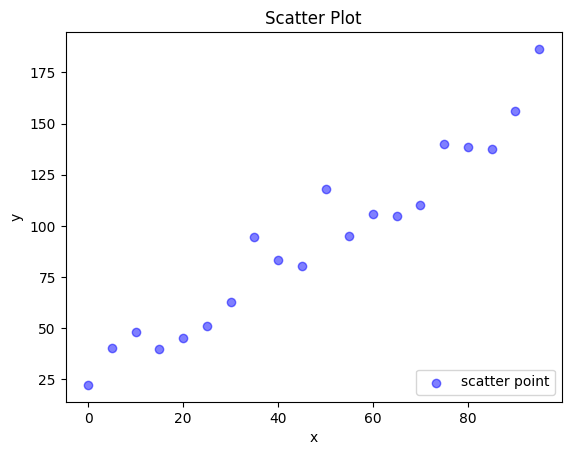

In [23]:
np.random.seed(19920613)

x = np.arange(0.0, 100.0, 5.0)
y= (x *1.5) + np.random.rand(20) * 50



plt.scatter(x,y, c = 'b', alpha = 0.5, label = 'scatter point')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'lower right')
plt.title('Scatter Plot')
plt.show()  

### 4-1 Chipotle

In [24]:
import pandas as pd


In [27]:
file_path = '/Users/sungminhong/Documents/dataanalysis/python-data-analysis/data/chipotle.tsv'

chipo = pd.read_csv(file_path, sep = '\t')

In [29]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [31]:
print(chipo.shape)
print(chipo.info())

(4622, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [34]:
chipo.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [41]:
# order_id change type to string

chipo['order_id'] = chipo['order_id'].astype('str')
print(chipo.describe())

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


In [46]:
print(len(chipo['order_id'].unique()))     # count unique value of order_id
print(len(chipo['item_name'].unique()))     # count unique value of item_name


1834
50


In [54]:
print(chipo['item_name'].value_counts().head(10))
print(len(chipo['item_name'].unique()))


item_name
Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: count, dtype: int64
50


In [64]:
len(chipo['item_name'].value_counts())

50

In [67]:
item_count = chipo['item_name'].value_counts()[:10]

for idx, (val, cnt) in enumerate(item_count.items(), 1):
    print('Top', idx, ':', val, cnt)


Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


In [75]:
# item name 별로 order_id의 갯수를 파악함
order_cnt = chipo.groupby('item_name')['order_id'].count()

# order_cnt = chipo.groupby('묶을 그룹이름')['그룹내 요소'].count()


In [76]:
print(order_cnt)


item_name
6 Pack Soft Drink                         54
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     11
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            162
Bowl                                       2
Burrito                                    6
Canned Soda                              104
Canned Soft Drink                        301
Carnitas Bowl                             68
Carnitas Burrito                          59
Carnitas Crispy Tacos                      7
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             726
Chicken Burrito                          553
Chicken Crispy Tacos                      47
Chicken Salad                              9
Chicken Salad Bowl                       110


In [78]:
order_sum = chipo.groupby('item_name')['quantity'].sum()

In [79]:
print(order_sum)

item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123


### Visualrization Analysis

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [94]:
item_quantity = chipo.groupby('item_name')['quantity'].count()

In [95]:
item_name_list = item_quantity.index.tolist()

In [97]:
x_pos = np.arange(len(item_name_list))
item_order_count = item_quantity.values.tolist()

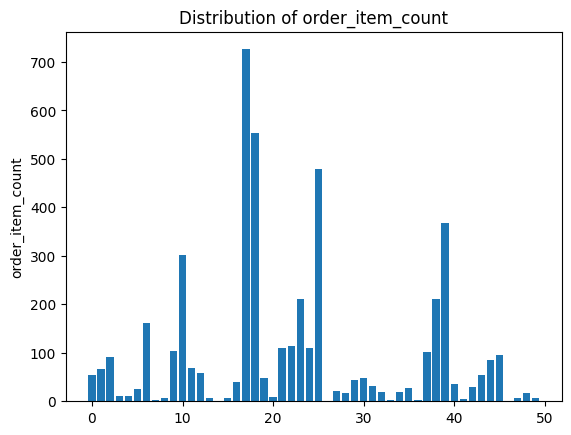

In [98]:
plt.bar(x_pos, item_order_count)
plt.ylabel('order_item_count')
plt.title('Distribution of order_item_count')

plt.show()

In [99]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

In [100]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


### 탐색적 분석 (EDA)

데이터를 이해하기 위한 조금더 복잡한 질문들로 탐색적 데이터 분석 연습하기
- 주문당 평균 계산 금액 출력하기
- 한주문에 10달러 이상 사용한 주문의 id 출력하기
- 각 아이템의 가격 구하기
- 가장 비싼 주문에서 item이 몇개가 팔렸는지
- Vaggie Salad Bowl이 몇번 주문되었는지 구하기
- chicken bowl을 2개 이상 주문한 주문 횟수 구하기

#### A. 주문당 평균 계산 금액 출력하기

In [111]:
# 새로운 열에 item_price x quantity 값 넣기
chipo['kostet'] = chipo['item_price'] * chipo['quantity']
mean_kostet = chipo.groupby('order_id')['kostet'].sum().mean().round(3)
print(f'$ {mean_kostet}')


$ 21.394


#### B. 한 주문에 10달러 이상 사용한 주문의 ID 출력

In [117]:
sum_kostet = chipo.groupby('order_id')['kostet'].sum()
sum_kostet


ten_dollar_over_order = []
for order_id, kostet in sum_kostet.items():
    if kostet >= 10:
        ten_dollar_over_order.append(order_id)


In [132]:
sum_kostet

order_id
1       11.56
10      13.20
100     10.08
1000    20.50
1001    10.08
        ...  
995     24.95
996     43.00
997     45.00
998     10.88
999     31.75
Name: kostet, Length: 1834, dtype: float64

In [118]:
print(ten_dollar_over_order)

['1', '10', '100', '1000', '1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008', '1009', '101', '1010', '1011', '1012', '1013', '1014', '1015', '1016', '1017', '1018', '1019', '102', '1020', '1021', '1022', '1023', '1024', '1025', '1026', '1027', '1028', '1029', '103', '1030', '1031', '1032', '1033', '1034', '1035', '1036', '1037', '1038', '1039', '104', '1040', '1041', '1042', '1043', '1044', '1045', '1046', '1047', '1048', '1049', '105', '1050', '1051', '1052', '1053', '1054', '1055', '1056', '1057', '1058', '1059', '106', '1060', '1061', '1062', '1063', '1064', '1065', '1066', '1067', '1068', '1069', '107', '1070', '1071', '1072', '1073', '1074', '1075', '1076', '1077', '1078', '1079', '108', '1080', '1081', '1082', '1083', '1084', '1085', '1086', '1087', '1088', '1089', '109', '1090', '1091', '1092', '1093', '1094', '1095', '1096', '1097', '1098', '1099', '11', '110', '1100', '1101', '1102', '1103', '1104', '1105', '1106', '1107', '1108', '1109', '111', '1110', '1111', '1

#### C. 각 아이템의 가격 구하기

In [151]:
file_path = '/Users/sungminhong/Documents/dataanalysis/python-data-analysis/data/chipotle.tsv'

chipo = pd.read_csv(file_path, sep = '\t')

In [157]:
chipo.drop_duplicates('item_name', keep = 'first', inplace = True, ignore_index = True)

In [158]:
chipo[['item_name', 'item_price']]

,item_name,item_price
0,Chips and Fresh Tomato Salsa,$2.39
1,Izze,$3.39
2,Nantucket Nectar,$3.39
3,Chips and Tomatillo-Green Chili Salsa,$2.39
4,Chicken Bowl,$16.98
5,Side of Chips,$1.69
6,Steak Burrito,$11.75
7,Steak Soft Tacos,$9.25
8,Chips and Guacamole,$4.45
9,Chicken Crispy Tacos,$8.75


#### D. 가장 비싼 주문에서 팔린 상품의 갯수

In [160]:
chipo['float_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

In [162]:
chipo['kostet'] = chipo['float_price'] * chipo['quantity']

In [220]:
max_id = chipo.groupby('order_id')['kostet'].sum().sort_values(ascending = False).index[0]
most_expensive_order_item_count = chipo[chipo['order_id'] == max_id].groupby('item_name')['quantity'].sum()
most_expensive_order_item_count

item_name
Bowl    3
Name: quantity, dtype: int64

#### E. Vaggie Salad Bowl이 몇번 주문되었는지 구하기

In [3]:
import pandas as pd

In [14]:
file_path = '/Users/sungminhong/Documents/dataanalysis/python-data-analysis/data/chipotle.tsv'

chipo = pd.read_csv(file_path, sep = '\t')

In [9]:
print(len(chipo[chipo['item_name'] == 'Veggie Salad Bowl']))

18


#### F.chicken bowl을 2개 이상 주문한 주문 횟수 구하기

In [28]:
cb_orders = chipo[chipo['item_name'] == 'Chicken Bowl']['quantity'] >= 2
print('chicken bowl orders: ', cb_orders.value_counts().get(True, 0))

chicken bowl orders:  33
